In [56]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [57]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [58]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [59]:
def create_model(activation):
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256,activation = activation),
        layers.Dense(128,activation = activation),
        layers.Dense(10,activation = 'softmax')
    ])
    model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
    return model

In [80]:
activations = ['sigmoid','tanh','relu']
histories={}
gradients={}   

In [81]:
for act in activations:
    print(f"\nTraining with {act.upper()} activation")
    model = create_model(act)
    X_batch,y_batch = X_train[:256],y_train[:256]
    with tf.GradientTape() as tape:
        preds = model(X_batch,training = True)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch,preds)
        grads = tape.gradient(loss,model.trainable_weights)

        grad_values = []
        for g in grads:
            if g is not None:
                grad_values.append(tf.reduce_mean(tf.abs(g)).numpy())
        gradients[act] = float(np.mean(grad_values))
        
        histories[act] = model.fit(
        X_train,y_train,
        validation_data = (X_test,y_test),
        epochs = 5,
        batch_size =128,
        verbose = 2
    )


Training with SIGMOID activation
Epoch 1/5
469/469 - 3s - 6ms/step - accuracy: 0.8498 - loss: 0.5953 - val_accuracy: 0.9246 - val_loss: 0.2622
Epoch 2/5
469/469 - 2s - 4ms/step - accuracy: 0.9334 - loss: 0.2304 - val_accuracy: 0.9414 - val_loss: 0.1977
Epoch 3/5
469/469 - 2s - 4ms/step - accuracy: 0.9492 - loss: 0.1727 - val_accuracy: 0.9545 - val_loss: 0.1512
Epoch 4/5
469/469 - 2s - 4ms/step - accuracy: 0.9599 - loss: 0.1368 - val_accuracy: 0.9612 - val_loss: 0.1272
Epoch 5/5
469/469 - 2s - 4ms/step - accuracy: 0.9678 - loss: 0.1101 - val_accuracy: 0.9655 - val_loss: 0.1092

Training with TANH activation
Epoch 1/5
469/469 - 4s - 8ms/step - accuracy: 0.9141 - loss: 0.2929 - val_accuracy: 0.9401 - val_loss: 0.1893
Epoch 2/5
469/469 - 2s - 5ms/step - accuracy: 0.9588 - loss: 0.1391 - val_accuracy: 0.9674 - val_loss: 0.1149
Epoch 3/5
469/469 - 2s - 5ms/step - accuracy: 0.9714 - loss: 0.0945 - val_accuracy: 0.9693 - val_loss: 0.0958
Epoch 4/5
469/469 - 2s - 5ms/step - accuracy: 0.9795 - 

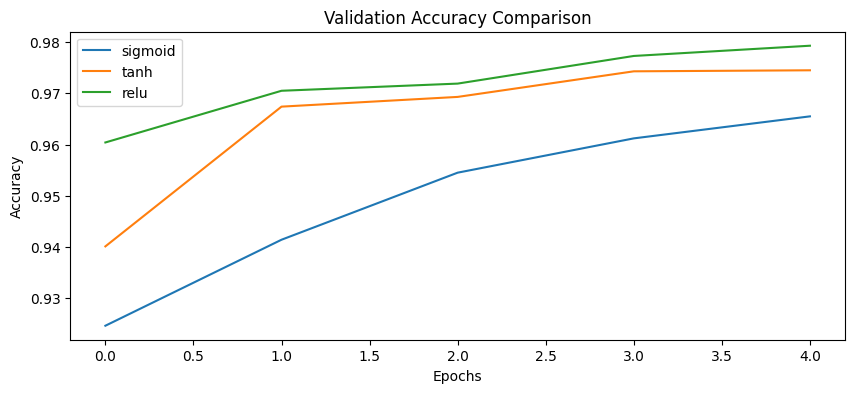

In [82]:
plt.figure(figsize=(10, 4))
for act in activations:
    plt.plot(histories[act].history['val_accuracy'], label=f'{act}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

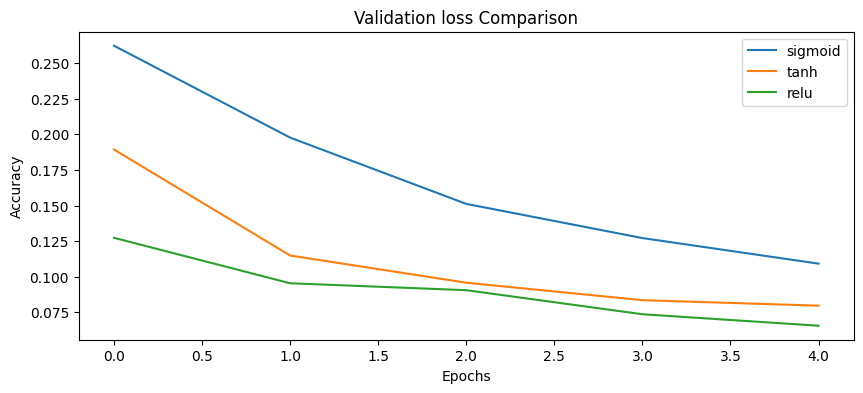

In [83]:
plt.figure(figsize=(10, 4))
for act in activations:
    plt.plot(histories[act].history['val_loss'], label=f'{act}')
plt.title('Validation loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Average Gradient Magnitudes:
sigmoid: 3.520704
tanh: 3.432744
relu: 2.371541


Text(0.5, 1.0, 'Average Gradient Magnitudes for Different Activations')

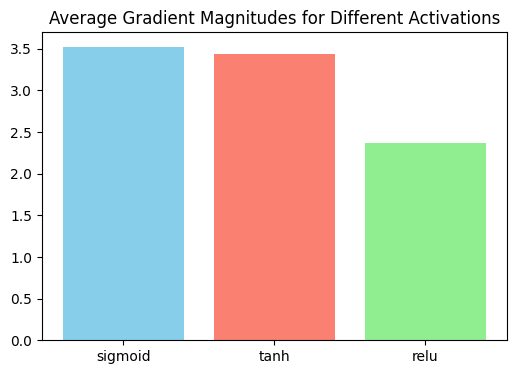

In [84]:
print("\nAverage Gradient Magnitudes:")
for act, grad in gradients.items():
    print(f"{act}: {grad:.6f}")
plt.figure(figsize=(6,4))
plt.bar(gradients.keys(), gradients.values(), color=['skyblue','salmon','lightgreen'])
plt.title('Average Gradient Magnitudes for Different Activations')